# E-commerce Sales Analysis


#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as px
import random
from scipy.interpolate import make_interp_spline, BSpline
from datetime import datetime
from  IPython.display import display



#### Multi-output

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#### Output left alignment

In [4]:
# Shouldn't using this function with the whole dataset, just use it for 10-20 rows
def show(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])])
    
    display(left_aligned_df)

#### Display full columns

In [5]:
pd.set_option('display.max_columns', None)

### Dataset Overview

In [6]:
df = pd.read_csv("ecom_data(full).csv")
df.head()

# df.drop(columns=['customer_city', 'seller_city']).to_csv('ecom_data(full).csv')
# df = df.drop_duplicates(df[['order_id', 'customer_id']])
# df.set_index('order_id', inplace=True)
# df.loc[:, ~df.columns.str.contains('Unnamed')].to_csv('ecom_data(full).csv')
# df.to_csv('ecom_data(full).csv')

,order_id,customer_id,quantity,price_MRP,payment,timestamp,rating,product_category,product_id,payment_type,order_status,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_state,seller_id,seller_state,payment_installments
0,9045fa841de3514ce900f5fc869d9b1f,2f8d6af8cb3875d6964eb4b5eff3a718,18,1074.38,1095.65,21-11-2017 22:34,5,health_beauty,0a37e05528984f47c754837344732fbb,credit_card,delivered,800,40,20,30,SP,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,22
1,404c087c1f661898fcfe9d4c4b1480d7,1ce70910bc16481433b771949f74552c,7,145.00,161.71,24-02-2017 22:55,5,health_beauty,67473aa97e981b3b8abaa6a8a768eb26,credit_card,delivered,400,38,12,25,RJ,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,23
2,d6d7c431275f0029dcc3538850930046,5b477d525dd0c1eb93148e22ce5d3ba6,11,145.00,161.71,19-01-2017 14:28,4,health_beauty,67473aa97e981b3b8abaa6a8a768eb26,credit_card,delivered,400,38,12,25,RJ,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,20
3,c0e02613bf15378f18d3498361a76c9d,c2f181778a12039532d79460d4ba59e2,12,555.00,585.95,1/6/2018 22:22,4,health_beauty,b60a0c8bd0333c69ee70565973709bbf,boleto,delivered,650,16,10,11,RO,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,10
4,1bf38e3450f15beeafbebe6e0665d612,21a9772e10934cf4598522d6ec827697,8,226.80,250.32,15-06-2018 20:36,5,health_beauty,08462528607b71ea62cbc019d91b001e,credit_card,delivered,650,16,10,11,MG,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,18


In [7]:
df.describe()

,quantity,price_MRP,payment,rating,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_installments
count,97254.000000,97254.000000,97254.000000,97254.000000,97254.000000,97254.000000,97254.000000,97254.000000,97254.000000
mean,13.646123,125.957733,158.127588,4.092068,2106.960146,30.144611,16.504308,23.067648,15.415572
std,4.930224,190.721701,217.893948,1.341565,3765.445686,16.140921,13.341868,11.747785,6.419760
min,1.000000,0.850000,0.010000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,10.000000,41.900000,60.100000,4.000000,300.000000,18.000000,8.000000,15.000000,11.000000
50%,15.000000,79.000000,103.260000,5.000000,700.000000,25.000000,13.000000,20.000000,17.000000
75%,18.000000,139.900000,175.640000,5.000000,1813.000000,38.000000,20.000000,30.000000,21.000000
max,20.000000,6735.000000,13664.080000,5.000000,40425.000000,105.000000,105.000000,118.000000,24.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97254 entries, 0 to 97253
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              97254 non-null  object 
 1   customer_id           97254 non-null  object 
 2   quantity              97254 non-null  int64  
 3   price_MRP             97254 non-null  float64
 4   payment               97254 non-null  float64
 5   timestamp             97254 non-null  object 
 6   rating                97254 non-null  int64  
 7   product_category      97254 non-null  object 
 8   product_id            97254 non-null  object 
 9   payment_type          97254 non-null  object 
 10  order_status          97254 non-null  object 
 11  product_weight_g      97254 non-null  int64  
 12  product_length_cm     97254 non-null  int64  
 13  product_height_cm     97254 non-null  int64  
 14  product_width_cm      97254 non-null  int64  
 15  customer_state     

### Preprocessing

#### Datetime format

In [9]:
df['timestamp'] = df["timestamp"].apply(lambda date : str(date).replace('/','-'))
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M')

#### Extract date and time

In [10]:
df.insert(6, 'time',df['timestamp'].dt.time,  allow_duplicates=True)
df.insert(6,'day', df['timestamp'].dt.day,  allow_duplicates=True)
df.insert(6, 'month',df['timestamp'].dt.month, allow_duplicates=True)
df.insert(6, 'year',df['timestamp'].dt.year,  allow_duplicates=True)
df = df.drop(columns={'timestamp'})

#### Normalize and reduce id

In [11]:
df['order_id'] = df['order_id'].str[::3]
df['customer_id'] = df['customer_id'].str[::3]
df['product_id'] = df['product_id'].str[::3]
df['seller_id'] = df['seller_id'].str[::3]
df

,order_id,customer_id,quantity,price_MRP,payment,year,month,day,time,rating,product_category,product_id,payment_type,order_status,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_state,seller_id,seller_state,payment_installments
0,958d5c058d1,2dfb7644e31,18,1074.38,1095.65,2017,11,21,22:34:00,5,health_beauty,0758475343b,credit_card,delivered,800,40,20,30,SP,c4b3620a31e,PR,22
1,4c7f18fd44d,171c44b1942,7,145.00,161.71,2017,2,24,22:55:00,5,health_beauty,67ae1bb6a82,credit_card,delivered,400,38,12,25,RJ,c4b3620a31e,PR,23
2,d73709c3534,575dcb1ecda,11,145.00,161.71,2017,1,19,14:28:00,4,health_beauty,67ae1bb6a82,credit_card,delivered,400,38,12,25,RJ,c4b3620a31e,PR,20
3,c01f3fd9679,c17a05d4dae,12,555.00,585.95,2018,6,1,22:22:00,4,health_beauty,ba80397670b,boleto,delivered,650,16,10,11,RO,c4b3620a31e,PR,10
4,13305ebe051,29204482e29,8,226.80,250.32,2018,6,15,20:36:00,5,health_beauty,06207ac0db1,credit_card,delivered,650,16,10,11,MG,c4b3620a31e,PR,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97249,c3b80a516d3,0cab74c1ea8,2,89.99,97.48,2018,6,3,22:34:00,5,fashion_childrens_clothes,8c0e0647521,credit_card,delivered,300,30,20,20,SP,d9840918a23,SP,9
97250,c007007e26a,f470bce592f,18,89.99,107.06,2017,9,30,18:54:00,5,fashion_childrens_clothes,8c0e0647521,boleto,delivered,300,30,20,20,BA,d9840918a23,SP,12
97251,33e63f35932,0aa8e33f057,16,49.90,66.69,2017,8,6,14:18:00,1,fashion_childrens_clothes,2808e62bb97,boleto,processing,120,19,11,15,SC,72dd4302ff7,RJ,22
97252,be0f07e44ac,95aed8a650a,17,100.00,115.45,2017,9,17,16:51:00,1,security_and_services,87fe33d48ed,boleto,delivered,400,26,22,11,DF,425e0843d9f,SP,22


#### Create the state map and its convert func

In [12]:
df_state_customer_interpret = pd.DataFrame({"customer_state":['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO'],
                         "full_state": ['Acre','Alagoas','Amazonas','Amapá','Bahia','Ceará','Distrito Federal','Espírito Santo','Goiás','Maranhão','Minas Gerais','Mato Grosso do Sul ','Mato Grosso','Pará','Paraíba','Pernambuco','Piauí','Paraná','Rio de Janeiro','Rio Grande do Norte','Rondônia','Roraima','Rio Grande do Sul  ','Santa Catarina','Sergipe','São Paulo','Tocantins']})
df_state_seller_interpret = pd.DataFrame({"seller_state":['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO'],
                         "full_state": ['Acre','Alagoas','Amazonas','Amapá','Bahia','Ceará','Distrito Federal','Espírito Santo','Goiás','Maranhão','Minas Gerais','Mato Grosso do Sul ','Mato Grosso','Pará','Paraíba','Pernambuco','Piauí','Paraná','Rio de Janeiro','Rio Grande do Norte','Rondônia','Roraima','Rio Grande do Sul  ','Santa Catarina','Sergipe','São Paulo','Tocantins']})

def ConvertState(eri, cus) -> pd.Series:
    if(cus):
        return pd.merge(df_state_customer_interpret, eri, on='customer_state', how='inner')['full_state']
    else :
        return pd.merge(df_state_customer_interpret, eri, on='seller_state', how='inner')['full_state']

# ConvertState(df.loc[::5000,'customer_state'], cus=True)


#### Normalize product category

In [13]:
df['product_category'] = df['product_category'].str.replace('_', ' ')

#### Analyze on new Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97254 entries, 0 to 97253
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              97254 non-null  object 
 1   customer_id           97254 non-null  object 
 2   quantity              97254 non-null  int64  
 3   price_MRP             97254 non-null  float64
 4   payment               97254 non-null  float64
 5   year                  97254 non-null  int32  
 6   month                 97254 non-null  int32  
 7   day                   97254 non-null  int32  
 8   time                  97254 non-null  object 
 9   rating                97254 non-null  int64  
 10  product_category      97254 non-null  object 
 11  product_id            97254 non-null  object 
 12  payment_type          97254 non-null  object 
 13  order_status          97254 non-null  object 
 14  product_weight_g      97254 non-null  int64  
 15  product_length_cm  

### Basic Stats (grouping, categorizing and count)

#### Total orders have been bought in three year

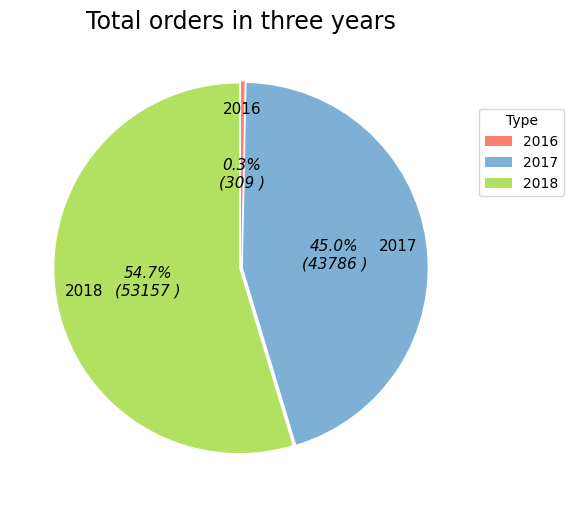

In [15]:
labels = ['2016','2017','2018']
title ="Total orders in three years"
data = df['year'].value_counts().sort_index()

# region Plotting Pie chart

# Color Palette
Spring_Pastels = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# configuration

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

plt.figure(figsize=(6,6))
tuple = plt.pie(
    x=data, 
    labels=labels,

    autopct=lambda pct: func(pct, data),
    # autopct='%1.2f%%', # show percentage with two decimal points
    textprops={'fontsize':11}, # increase the size of all text elements 
    colors=Spring_Pastels[:len(data)],

    startangle=90, 
    counterclock=False,
    
    labeldistance=0.85,
    pctdistance=0.5,

    explode = list(map(lambda x : x if (x < 0.15) else 0.01, np.random.random(len(data))))
)

for text in tuple[1]: #texts
    text.set_fontweight('regular')
    text.set_horizontalalignment('center')

for auto_text in tuple[2]: # Autotexts
    auto_text.set_horizontalalignment('center')
    auto_text.set_fontstyle('italic')

plt.legend(tuple[0], labels,
        title="Type",
        loc="center left",
        bbox_to_anchor=(1, 0, 0, 1.5))

plt.title(
    label=title, # Label
    fontdict={"fontsize":17},
    loc='center'
)


plt.show()
# endregion



#### Total rating in three years for each type of star

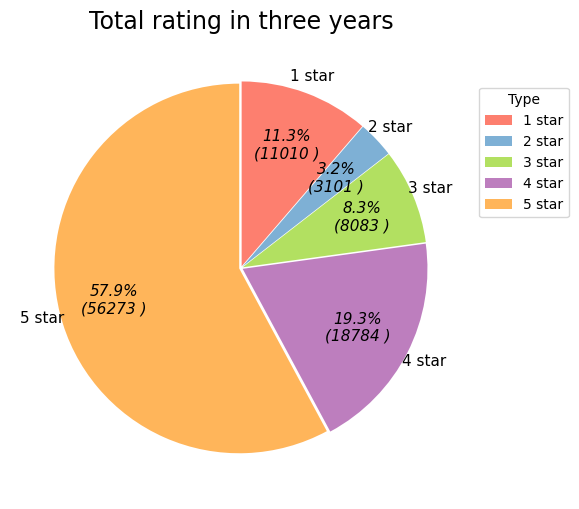

In [16]:
labels = ['1 star', '2 star', '3 star', '4 star', '5 star']

title ="Total rating in three years"
rating_in_3years = df['rating'].value_counts().sort_index().to_frame()
data = rating_in_3years['count'].values

# region Plot 1

# Color Palette
Spring_Pastels = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# configuration

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

plt.figure(figsize=(6,6))
tuple = plt.pie(
    x=data, 
    labels=labels,

    autopct=lambda pct: func(pct, data),
    # autopct='%1.2f%%', # show percentage with two decimal points
    textprops={'fontsize':11}, # increase the size of all text elements 
    colors=Spring_Pastels[:len(data)],

    startangle=90, 
    counterclock=False,
    
    # labeldistance=0.85,
    pctdistance=0.7,

    explode = list(map(lambda x : x if (x < 0.15) else 0.01, np.random.random(len(data))))
)

for text in tuple[1]: #texts
    text.set_fontweight('regular')
    text.set_horizontalalignment('center')

for auto_text in tuple[2]: # Autotexts
    auto_text.set_horizontalalignment('center')
    auto_text.set_fontstyle('italic')

plt.legend(tuple[0], labels,
        title="Type",
        loc="center left",
        bbox_to_anchor=(1, 0, 0, 1.5))

plt.title(
    label=title, # Label
    fontdict={"fontsize":17},
    loc='center'
)


plt.show()
# endregion


#### Total number of payment types has been used (using bar, pie chart)

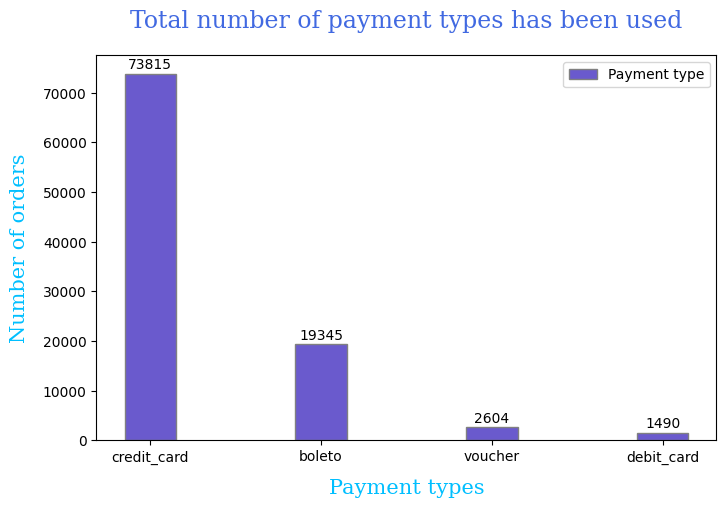

In [17]:
labels = df['payment_type'].value_counts().index
data = df['payment_type'].value_counts().values
title = "Total number of payment types has been used"

x_axis_name = "Payment types"
y_axis_name = "Number of orders"

# region Plotting Bar Char
plt.figure(figsize=(8,5), dpi=100)

plt.bar(labels,data, color ='slateblue',width=0.3 , edgecolor ='grey', label ='Payment type') 
for i in range(len(data)):
    plt.text(i, data[i]+ 1000,data[i], ha='center')

plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion



#### Total number of each Order status

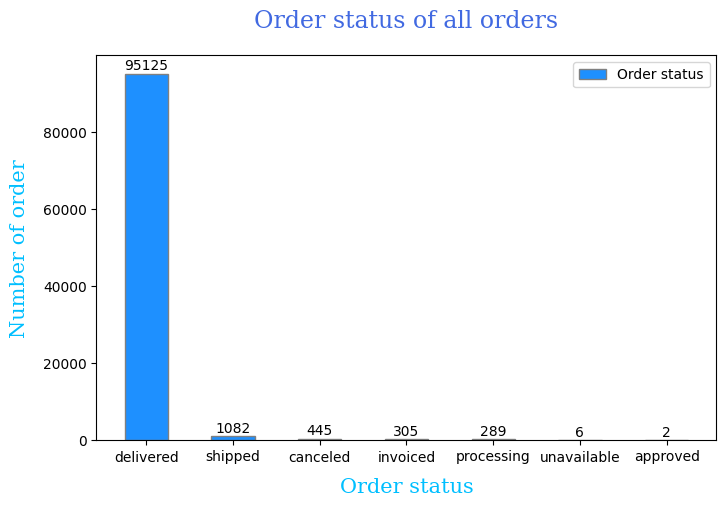

In [18]:

labels = df['order_status'].value_counts().index
data = df['order_status'].value_counts().values
title = "Order status of all orders"
x_axis_name = "Order status"
y_axis_name = "Number of order"

# region Plotting Bar Char
plt.figure(figsize=(8,5), dpi=100)

plt.bar(labels,data, color ='dodgerblue',width=0.5 , edgecolor ='grey', label ='Order status') 
for i in range(len(data)):
    plt.text(i, data[i]+ 1000,data[i], ha='center')

plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion



#### Total customers on each state

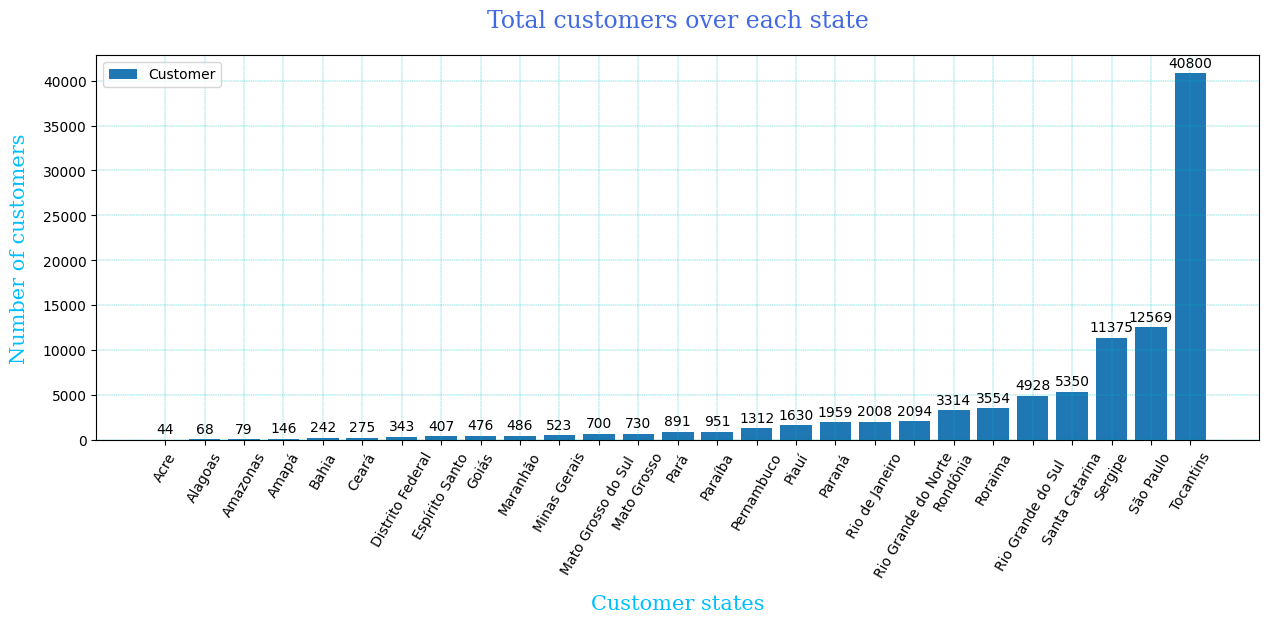

In [19]:

df_state_customer = df[['customer_id', 'customer_state']].groupby(['customer_state']).count()
df_state_customer = df_state_customer.sort_values('customer_id')
df_state_customer = df_state_customer.reset_index(level='customer_state')

labels = ConvertState(df_state_customer['customer_state'], cus=True)
data = df_state_customer['customer_id']
title = "Total customers over each state"
x_axis_name = "Customer states"
y_axis_name = "Number of customers"

# region Plotting Bar Char
plt.figure(figsize=(15,5), dpi=100)
plt.bar(x=labels, height = data, label="Customer") 
for i in range(len(data)):
    plt.text(i, data[i]+ 700,data[i], ha='center')

plt.grid(True, linewidth=0.3, linestyle='--',color='c') #only for single column
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()
plt.xticks(rotation=60)

plt.show() 
# endregion


#### Total number of Seller on each state

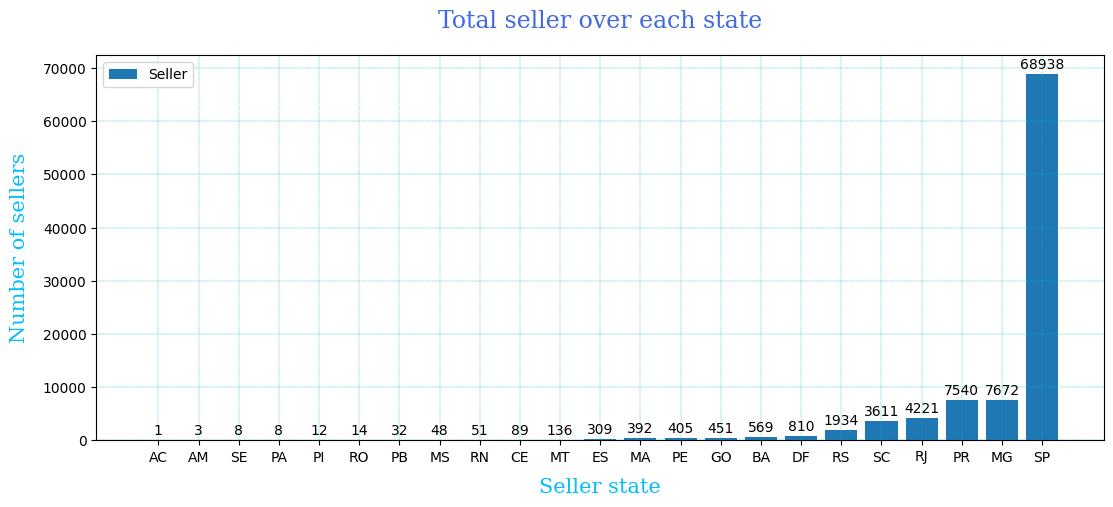

In [20]:
df_seller_state = df[['seller_id', 'seller_state']].groupby('seller_state').count()
df_seller_state= df_seller_state.sort_values('seller_id')
df_seller_state = df_seller_state.reset_index('seller_state')

labels = df_seller_state['seller_state']
data = df_seller_state['seller_id']
title = "Total seller over each state"
x_axis_name = "Seller state"
y_axis_name = "Number of sellers"

# region Plotting Bar Char
plt.figure(figsize=(13,5), dpi=100)
plt.bar(x=labels, height = data, label="Seller") 
for i in range(len(data)):
    plt.text(i, data[i]+ 1000,data[i], ha='center',)
 

plt.grid(True, linewidth=0.3, linestyle='--',color='c') #only for single column

plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion


#### Total orders with payment installments

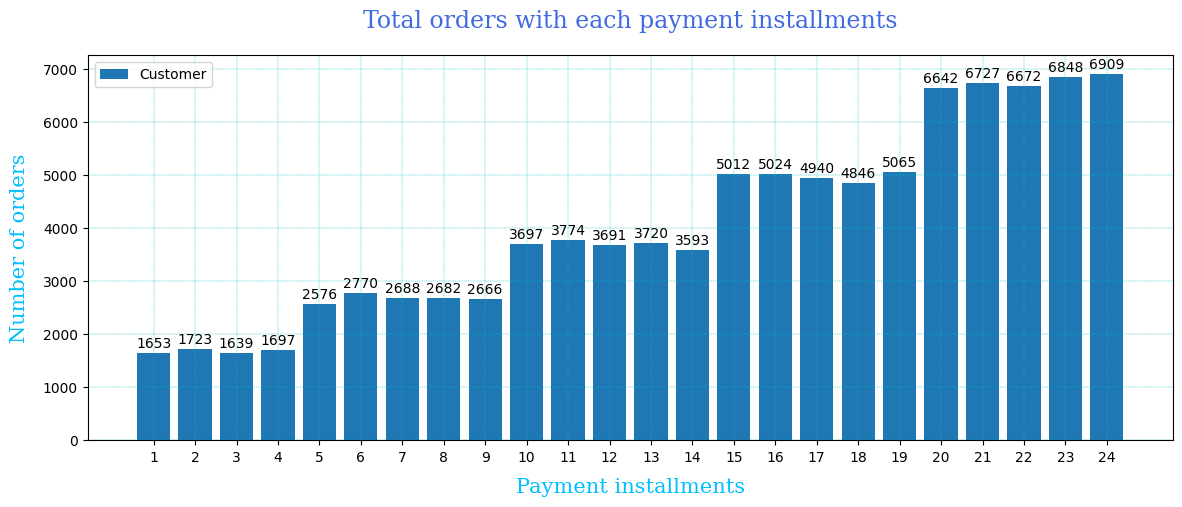

In [21]:
df_pay_ins = df[['order_id', 'payment_installments']].groupby('payment_installments').count()
df_pay_ins= df_pay_ins.sort_values('payment_installments')
df_pay_ins = df_pay_ins.reset_index(level='payment_installments')

labels = df_pay_ins['payment_installments']
data = df_pay_ins['order_id']
title = "Total orders with each payment installments"
x_axis_name = "Payment installments"
y_axis_name = "Number of orders"

# region Plotting Bar Char
plt.figure(figsize=(14,5), dpi=100)
plt.bar(labels, data, label="Customer") 

for i in range(len(data)):
    plt.text(i+ 1, data[i] + 100,data[i], ha='center')

plt.xticks(ticks=labels)
plt.grid(True, linewidth=0.3, linestyle='--',color='c') #only for single column
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion



#### Total rating stars in three single years

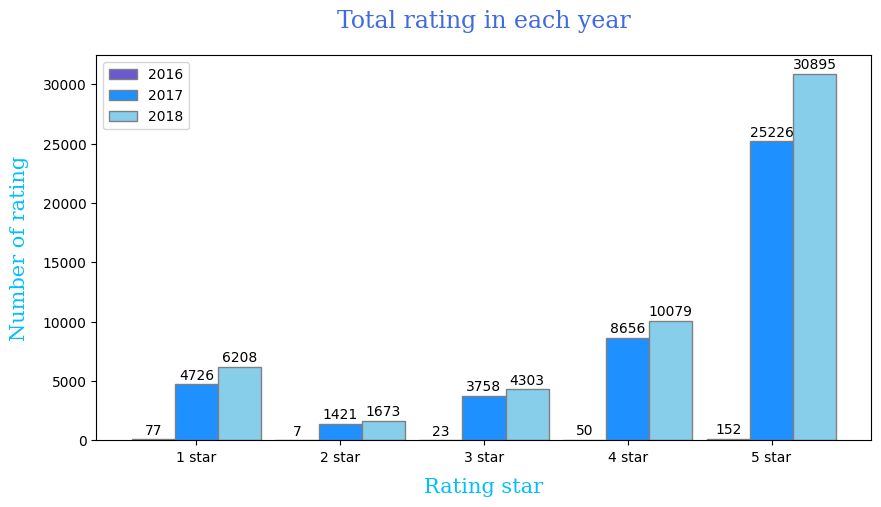

In [22]:
rating_2016 = df[df['year'] == 2016][['rating']].value_counts().sort_index().values
rating_2017 = df[df['year'] == 2017][['rating']].value_counts().sort_index().values
rating_2018 = df[df['year'] == 2018][['rating']].value_counts().sort_index().values
labels_x_axis = ['1 star','2 star', '3 star', '4 star', '5 star']
title = "Total rating in each year"
x_axis_name = "Rating star"
y_axis_name = "Number of rating"

# region Plotting Bar Char
barWidth = 0.3
plt.figure(figsize=(10,5), dpi=100)
br1 = np.arange(len(rating_2016)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

for i in range(len(rating_2016)):
    plt.text(i, rating_2016[i] + 400,rating_2016[i], ha='center')
    plt.text(i + 0.3, rating_2017[i] + 400,rating_2017[i], ha='center')
    plt.text(i +0.6, rating_2018[i] + 400,rating_2018[i], ha='center')

plt.bar(br1, rating_2016, color ='slateblue', width = barWidth,  edgecolor ='grey', label ='2016') 
plt.bar(br2, rating_2017, color ='dodgerblue', width = barWidth, edgecolor ='grey', label ='2017') 
plt.bar(br3, rating_2018, color ='skyblue', width = barWidth, edgecolor ='grey', label ='2018') 
 
plt.xticks([r + barWidth for r in range(len(rating_2016))], labels_x_axis)
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion


#### Total products over its categoy

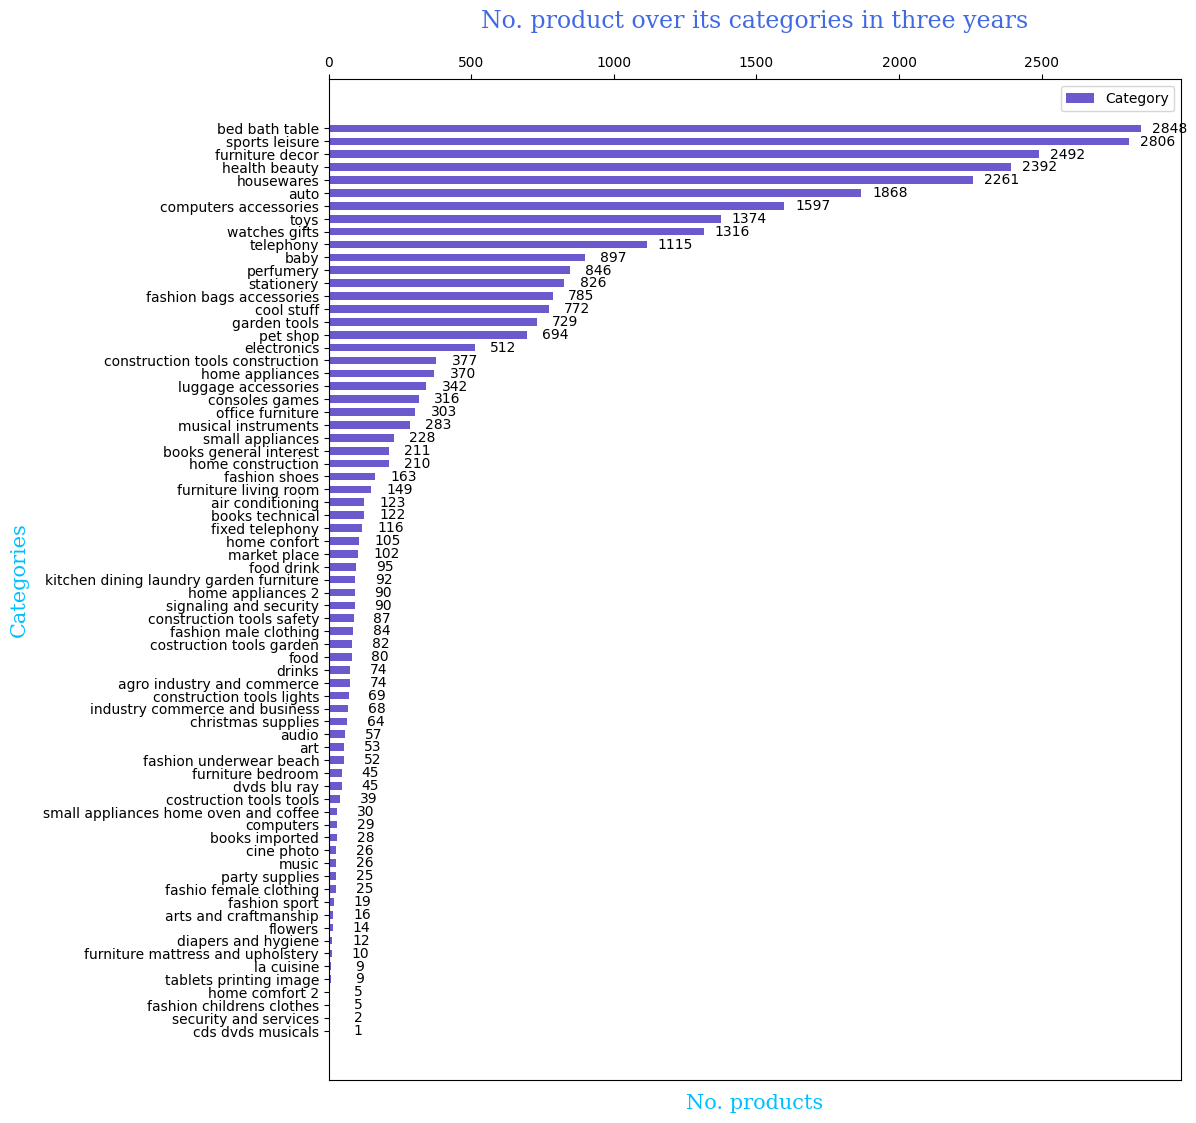

In [23]:
df_pro_cate = df[['product_category', 'product_id']].groupby('product_category').nunique()
df_pro_cate = df_pro_cate.sort_values('product_id')
df_pro_cate = df_pro_cate.reset_index('product_category')


labels = df_pro_cate['product_category']
data = df_pro_cate['product_id']
title = "No. product over its categories in three years"
x_axis_name = "No. products"
y_axis_name = "Categories"

plt.figure(figsize=(11,13), dpi=100)
plt.barh(y=labels,width=data,label="Category",height=0.6,color ='slateblue')
 
for i in range(len(data)):
    plt.text( data[i] + 100,i - 0.3,data[i], ha='center')
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.tick_params(top=True, labeltop=True, labelbottom=False, bottom=False)

plt.legend()
plt.show()


#### Total product category over its orders

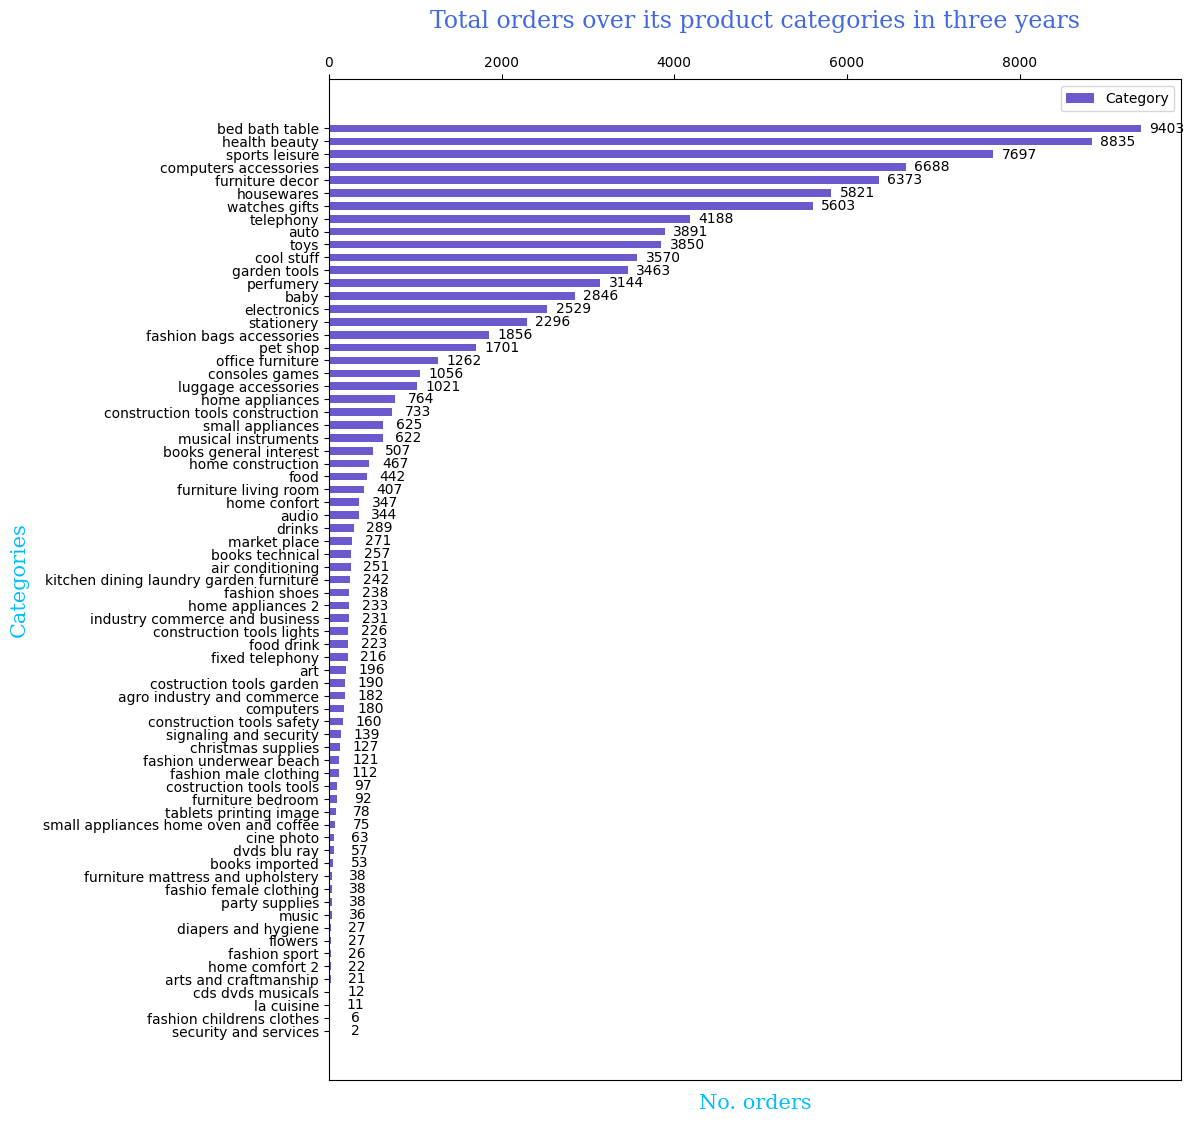

In [24]:
df_ord_cate = df['product_category'].value_counts()
df_ord_cate = df_ord_cate.sort_values()

labels = df_ord_cate.index
data = df_ord_cate.values
title = "Total orders over its product categories in three years"
x_axis_name = "No. orders"
y_axis_name = "Categories"

plt.figure(figsize=(11,13), dpi=100)
plt.barh(y=labels,width=data,label="Category",height=0.6,color ='slateblue')
 
for i in range(len(data)):
    plt.text( data[i] + 300,i - 0.3,data[i], ha='center')
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.tick_params(top=True, labeltop=True, labelbottom=False, bottom=False)

plt.legend()
plt.show()


#### Categories and it rating in average

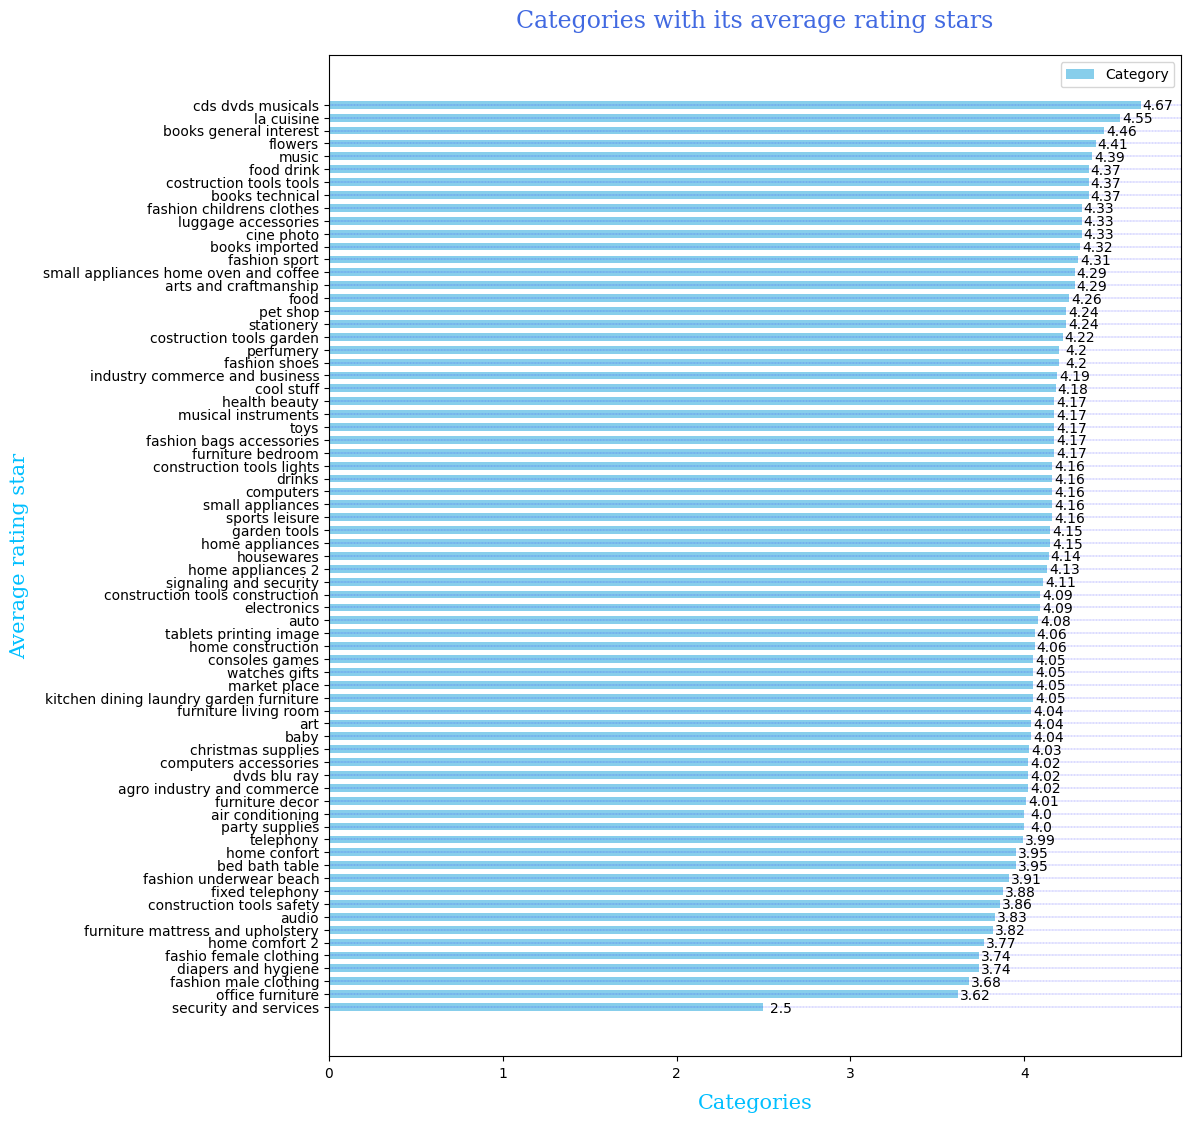

In [25]:
df_cate_avg_ord = pd.merge(df_ord_cate, df[['product_category', 'rating']], on='product_category', how='left').groupby('product_category').mean('rating')
df_cate_avg_ord.loc[:,'rating'] = df_cate_avg_ord.loc[:,'rating'].apply(lambda x : round(x, 2))
df_cate_avg_ord = df_cate_avg_ord.sort_values('rating')

labels = df_cate_avg_ord.index
data = df_cate_avg_ord['rating']
title = "Categories with its average rating stars"
x_axis_name = "Categories"
y_axis_name = "Average rating star"


plt.figure(figsize=(11,13), dpi=100)
plt.barh(y=labels,width=data,label="Category",height=0.6,color ='skyblue')
 
for i in range(len(data)):
    plt.text( data.iloc[i] + 0.1 ,i-0.4,data.iloc[i], ha='center')
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.grid(True, linewidth=0.2, linestyle='--',color='b',axis='y') #only for single column


plt.legend()
plt.show()

#### Categories and its average price MRP

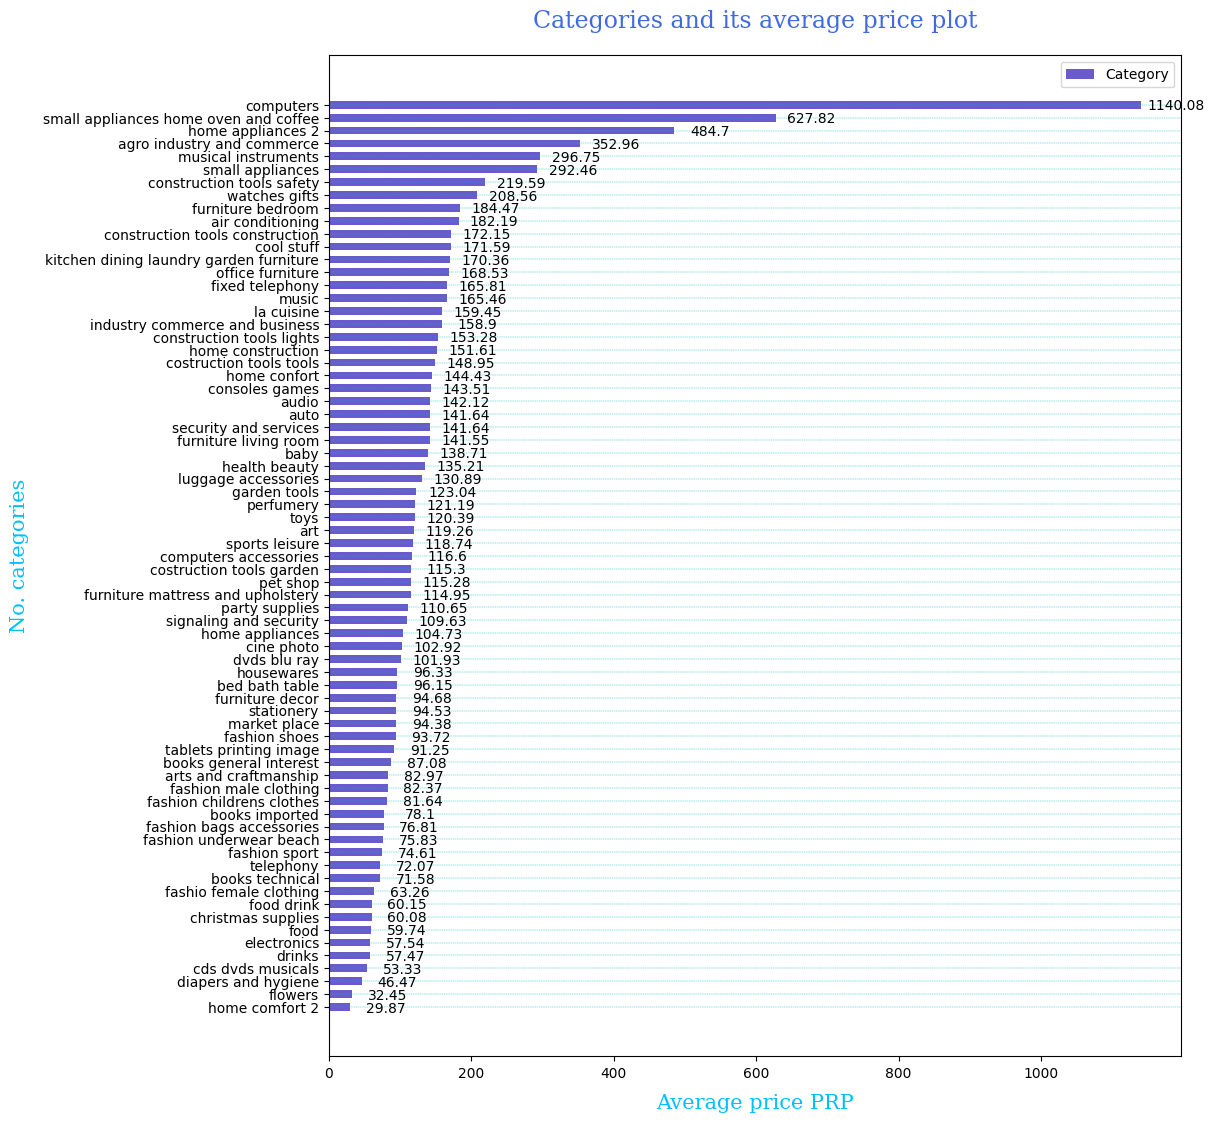

In [26]:
df_cate_avg_ord = pd.merge(df_ord_cate, df[['product_category', 'price_MRP']], on='product_category', how='left').groupby('product_category').mean('price_MRP')
df_cate_avg_ord.loc[:,'price_MRP'] = df_cate_avg_ord.loc[:,'price_MRP'].apply(lambda x : round(x, 2))
df_cate_avg_ord = df_cate_avg_ord.sort_values('price_MRP')

labels = df_cate_avg_ord.index
data = df_cate_avg_ord['price_MRP']
title = "Categories and its average price plot"
x_axis_name = "Average price PRP"
y_axis_name = "No. categories"

plt.figure(figsize=(11,13), dpi=100)
plt.barh(y=labels,width=data,label="Category",height=0.6,color ='slateblue')
 
for i in range(len(data)):
    plt.text( data.iloc[i] + 50 ,i-0.4,data.iloc[i], ha='center')
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.grid(True, linewidth=0.3, linestyle='--',color='c', axis='y') #only for single column

plt.legend()
plt.show()

#### Proportion of no. orders in Rio de Janeiro

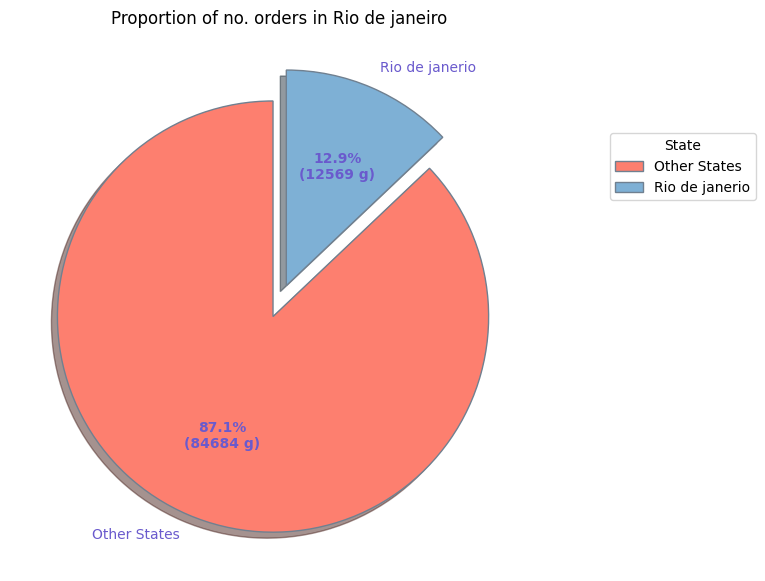

In [27]:
df_customer_state_orders = df['customer_state'].value_counts().reset_index()


# df_customer_state_orders

# Creating dataset
labels = ['Other States','Rio de janerio']
 
data = [
    df_customer_state_orders['count'].sum() - df_customer_state_orders.loc[1, 'count'],
    df_customer_state_orders.loc[1, 'count']
]
 

#  Configuration 
Spring_Pastels = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(x=data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=list(map(lambda x : x if (x < 0.24) else 0.08, np.random.random(len(data))))   ,
                                  labels=labels,
                                  shadow=True,
                                  colors=(Spring_Pastels)[:len(data)],
                                  startangle=90,
                                  wedgeprops= {'linewidth': 1, 'edgecolor': "slategray"}, # border
                                  textprops=dict(color="slateblue"))
ax.legend(wedges, labels,
          title="State",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0, 1.5))
# ax.legend()
 
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Proportion of no. orders in Rio de janeiro")
 
plt.show()

### Explore dataset distribution

#### The distribution of quantity over order

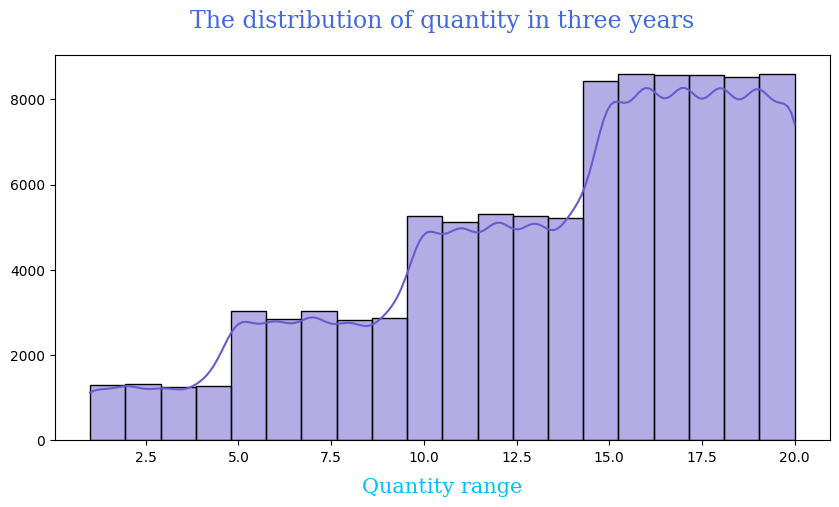

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='quantity', bins=20, kde=True, color='slateblue')
plt.xlabel("Quantity range",fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel("",fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title("The distribution of quantity in three years",fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)

plt.show()

#### The distribution of payment over orders

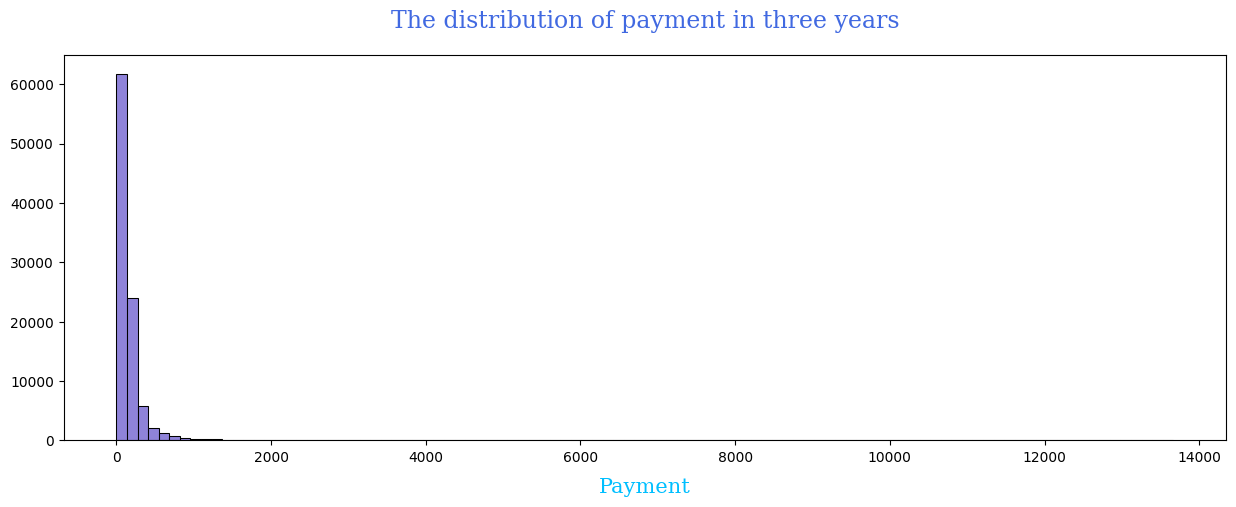

In [29]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='payment', bins=100,color='slateblue')
plt.xlabel("Payment",fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel("",fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title("The distribution of payment in three years",fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)


plt.show()

#### Aggregate the payment by monthly in 2017

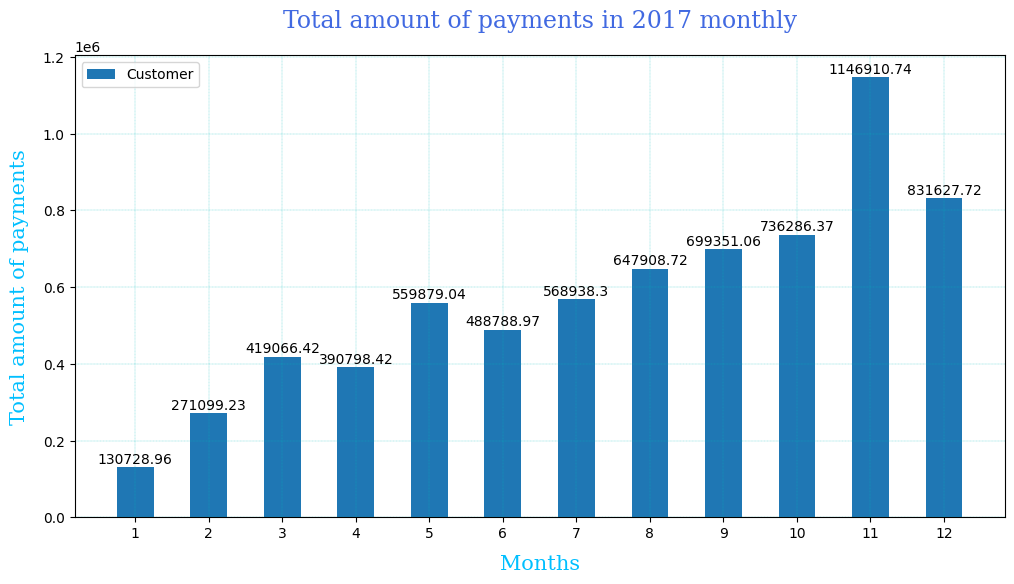

In [30]:
df_pay_in_2017 = df[df['year']==2017][['month', 'payment']].groupby('month').sum().reset_index()

labels = df_pay_in_2017['month']
data = df_pay_in_2017['payment']
title = "Total amount of payments in 2017 monthly"
x_axis_name = "Months"
y_axis_name = "Total amount of payments"

# region Plotting Bar Char
plt.figure(figsize=(12,6), dpi=100)
plt.bar(labels, data, label="Customer", width=0.5) 

for i in range(len(data)):
    plt.text(i+ 1, data[i] + 10000,data[i], ha='center')

plt.xticks(ticks=labels)
plt.grid(True, linewidth=0.2, linestyle='--',color='c') #only for single column
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion


#### No. of order in three year, pltting by month

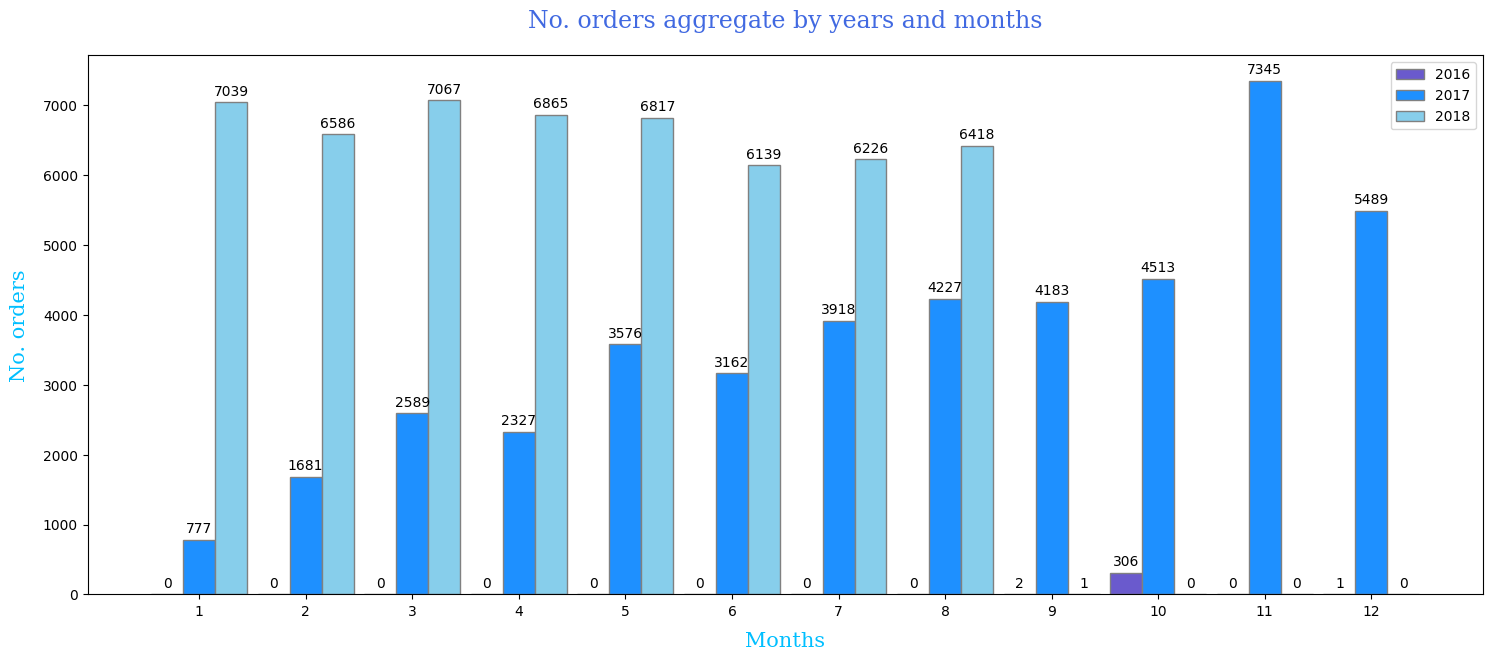

In [31]:
df_ord_2016 = df[df['year'] == 2016]['month'].value_counts()
df_ord_2017 = df[df['year'] == 2017]['month'].value_counts()
df_ord_2018 = df[df['year'] == 2018]['month'].value_counts()

df_ord_2018 = df_ord_2018._append(pd.Series([0,0,0], index=[10,11,12]))
df_ord_2016 = df_ord_2016._append(pd.Series([0,0,0,0,0,0,0,0,0], index=[1,2,3,4,5,6,7,8,11]))

df_ord_2016 = df_ord_2016.sort_index().reset_index()
df_ord_2017 = df_ord_2017.sort_index().reset_index()
df_ord_2018 = df_ord_2018.sort_index().reset_index()


labels_x_axis = "1 2 3 4 5 6 7 8 9 10 11 12".split(' ')
title = "No. orders aggregate by years and months"
x_axis_name = "Months"
y_axis_name = "No. orders"

# region Plotting Bar Char
barWidth = 0.3
plt.figure(figsize=(18,7), dpi=100)
br1 = np.arange(len(df_ord_2016)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

for i in range(df_ord_2016.shape[0]):
    plt.text(i , df_ord_2016[0][i] + 100,df_ord_2016[0][i], ha='center')
    plt.text(i + 0.3 , df_ord_2017['count'][i] + 100,df_ord_2017['count'][i], ha='center')
    plt.text(i + 0.6 , df_ord_2018[0][i] + 100, df_ord_2018[0][i], ha='center')

plt.bar(br1, df_ord_2016[0], color ='slateblue', width = barWidth,  edgecolor ='grey', label ='2016') 
plt.bar(br2, df_ord_2017['count'], color ='dodgerblue', width = barWidth, edgecolor ='grey', label ='2017') 
plt.bar(br3, df_ord_2018[0], color ='skyblue', width = barWidth, edgecolor ='grey', label ='2018') 
 
plt.xticks([r + barWidth for r in range(len(df_ord_2016))], labels_x_axis)
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion



#### The correlation between number of products belongs to each category has been bought and number of products it have

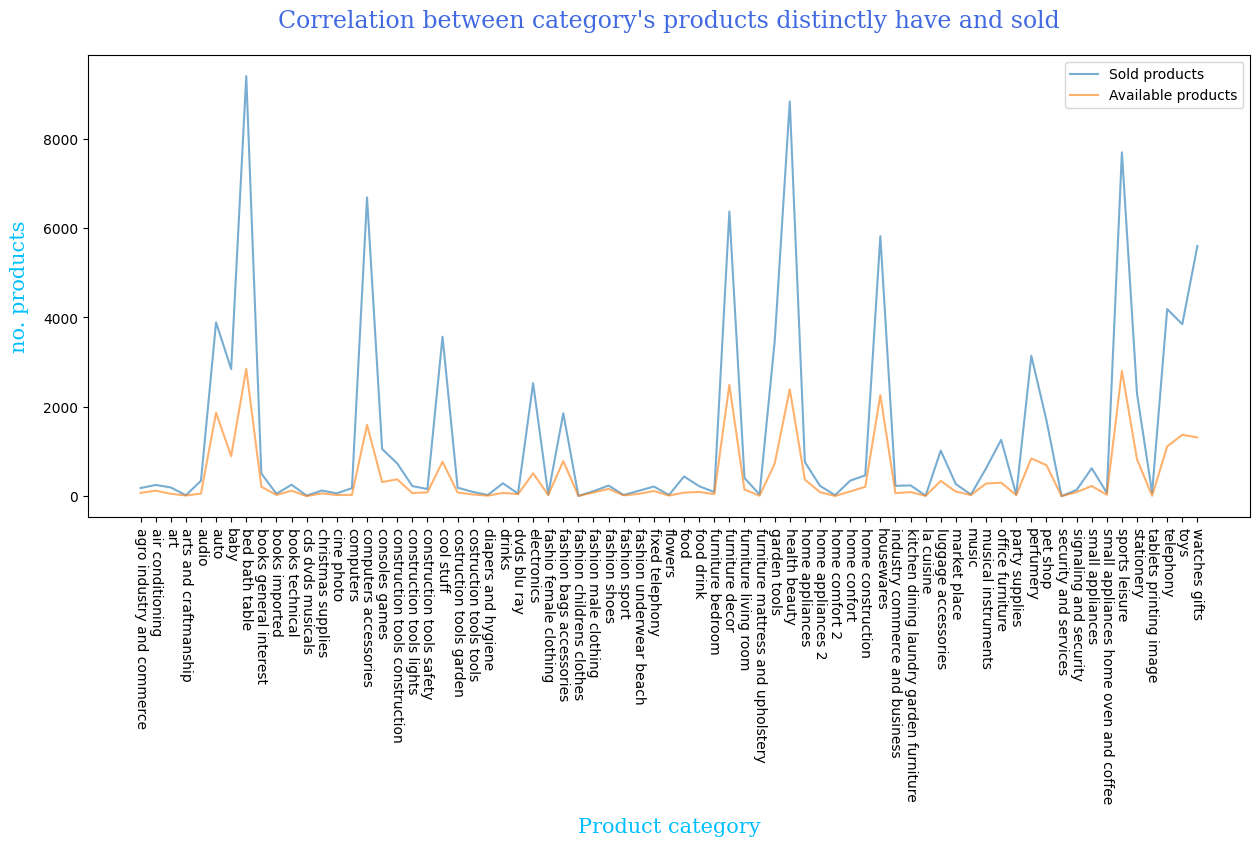

In [32]:
# duplicated counter
df_sold_pro_cate = df[['product_category','product_id']].groupby('product_category').count()
df_sold_pro_cate = df_sold_pro_cate.rename(columns={'product_id': 'no. sold pro'}) 

df_uni_pro_cate = df[['product_category','product_id']].drop_duplicates('product_id').groupby('product_category').count()
df_uni_pro_cate = df_uni_pro_cate.rename(columns={'product_id': 'no. uni pro'}) 

df_uni_sold_pro = pd.merge(df_sold_pro_cate, df_uni_pro_cate, on='product_category', how='outer')

plt.figure(figsize=(15,6))
sns.lineplot(data=df_uni_sold_pro, y='no. sold pro',x='product_category',alpha=0.6, linewidth=1.5, label="Sold products")
sns.lineplot(data=df_uni_sold_pro, y='no. uni pro', x='product_category',alpha=0.6, linewidth=1.5, label= "Available products")
plt.xlabel("Product category",fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel("no. products",fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title("Correlation between category's products distinctly have and sold",fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.xticks(rotation=270)

plt.show() 


#### Average price MRP in each state

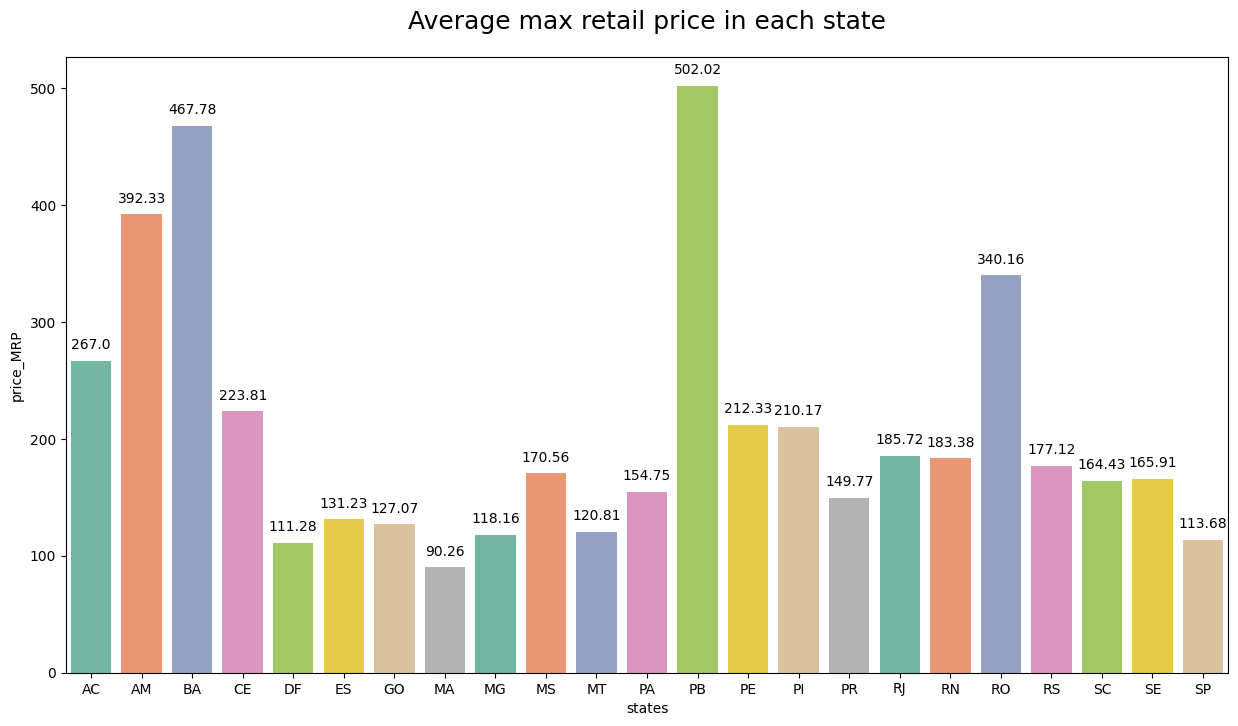

In [33]:
df_ave_price_state = df.groupby(['seller_state']).mean('price_MRP')[[ 'price_MRP']]
df_ave_price_state['price_MRP'] = round(df_ave_price_state['price_MRP'], 2)
df_ave_price_state = df_ave_price_state.reset_index()
df_ave_price_state = df_ave_price_state.rename(columns={'seller_state': 'states'})

plt.figure(figsize=(15,8))
plt.title("Average max retail price in each state", pad=20, fontsize=18)

sns.barplot(data=df_ave_price_state, x='states', y='price_MRP',palette='Set2', hue='states', errorbar=None)
for i in range(len(df_ave_price_state)):
    plt.text(i, df_ave_price_state['price_MRP'][i] + 10, df_ave_price_state['price_MRP'][i], ha='center')

### Analysis and Visualization in advanced (variability, correlation)

#### Customer segmentation

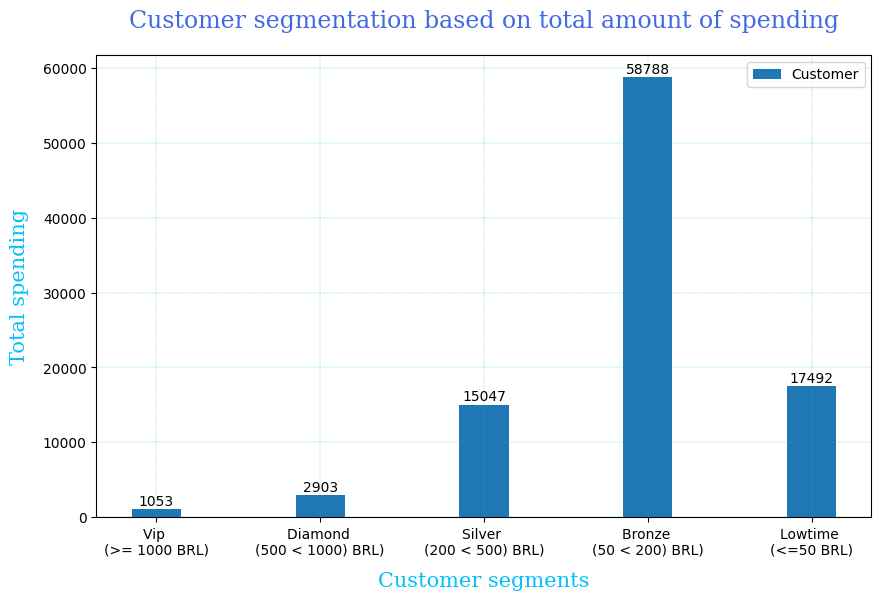

In [34]:
df_cus_seg = df[df["order_status"] == "delivered"][["customer_id", "payment"]].groupby(by="customer_id").sum()


labels = ["Vip \n(>= 1000 BRL)","Diamond \n(500 < 1000) BRL)", "Silver \n(200 < 500) BRL)","Bronze \n(50 < 200) BRL)", "Lowtime \n(<=50 BRL)"]
data = pd.DataFrame(data={"No. customers": [df_cus_seg[(df_cus_seg["payment"] >= 1000)].shape[0], 
                            df_cus_seg[(df_cus_seg["payment"] >= 500) & (df_cus_seg["payment"] < 1000)].shape[0],
                            df_cus_seg[(df_cus_seg["payment"] >= 200) & (df_cus_seg["payment"] < 500)].shape[0],
                            df_cus_seg[(df_cus_seg["payment"] >= 50) & (df_cus_seg["payment"] < 200)].shape[0],
                            df_cus_seg[df_cus_seg["payment"].between(0, 50)].shape[0]]}, index=[1,2,3,4,5])
title = "Customer segmentation based on total amount of spending"
x_axis_name = "Customer segments"
y_axis_name = "Total spending"

# region Plotting Bar Char
plt.figure(figsize=(10,6), dpi=100)
plt.bar(labels, data['No. customers'], width=0.3,label="Customer") 

for i in range(1,len(data['No. customers']) + 1):
    plt.text(i - 1, data['No. customers'][i] + 500,data['No. customers'][i], ha='center')

plt.grid(True, linewidth=0.2, linestyle='--',color='c') #only for single column
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion


#### Monthly revenue in 2017,2018

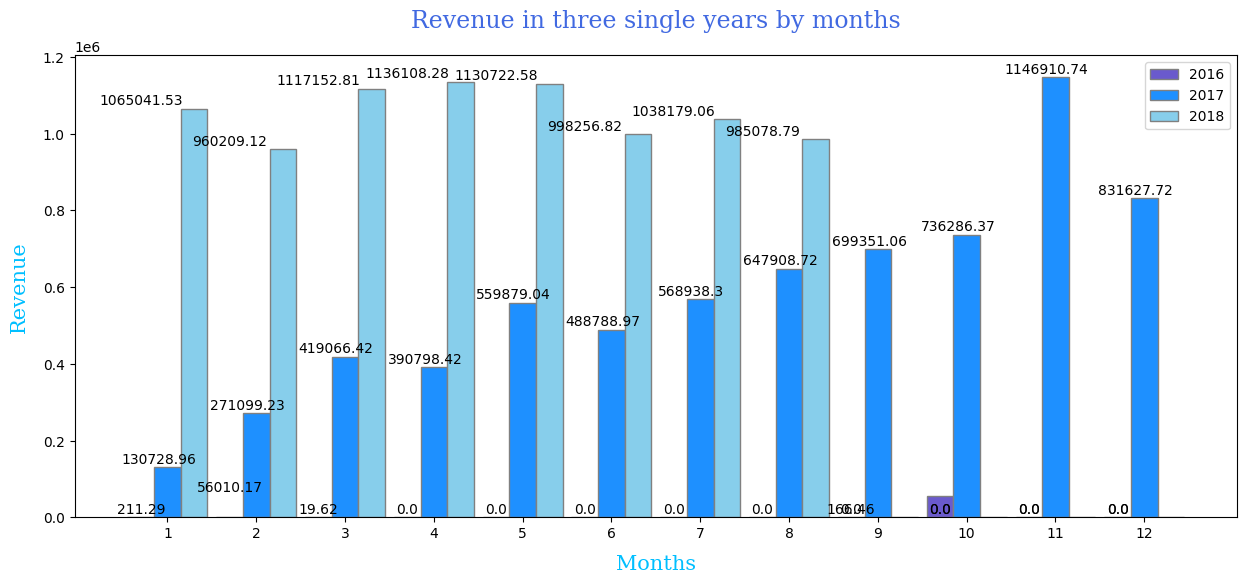

In [35]:
df_revenue_2016 = df[df["year"] == 2016][['month', "payment"]].groupby('month').sum()
df_revenue_2017 = df[df["year"] == 2017][['month', "payment"]].groupby('month').sum()
df_revenue_2018 = df[df["year"] == 2018][['month', "payment"]].groupby('month').sum()

df_revenue_2016=  df_revenue_2016.reset_index()
for i in range(1,9):
    df_revenue_2016.loc[df_revenue_2016.shape[0]] = [i,0]
df_revenue_2016.loc[df_revenue_2016.shape[0]] = [11,0]
df_revenue_2016 = df_revenue_2016.sort_values('month')

df_revenue_2018=  df_revenue_2018.reset_index()
for i in range(10,13):
    df_revenue_2018.loc[df_revenue_2018.shape[0]] = [i,0]
df_revenue_2018 = df_revenue_2018.sort_values('month')
df_revenue_2017 = df_revenue_2017.reset_index().sort_values('month')

labels_x_axis = "1 2 3 4 5 6 7 8 9 10 11 12".split(' ')
title = "Revenue in three single years by months"
x_axis_name = "Months"
y_axis_name = "Revenue"

# region Plotting Bar Char
barWidth = 0.3
plt.figure(figsize=(15,6), dpi=100)
br1 = np.arange(len(df_revenue_2016)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

for i in range(len(df_revenue_2016)):
    plt.text(i  + 0.2, df_revenue_2017['payment'][i] + 10000,df_revenue_2017['payment'][i], ha='center')
    plt.text(i , df_revenue_2016['payment'][i] + 10000,df_revenue_2016['payment'][i], ha='center')
    plt.text(i , df_revenue_2018['payment'][i] + 10000, df_revenue_2018['payment'][i], ha='center')

plt.bar(br1, df_revenue_2016['payment'], color ='slateblue', width = barWidth,  edgecolor ='grey', label ='2016') 
plt.bar(br2, df_revenue_2017['payment'], color ='dodgerblue', width = barWidth, edgecolor ='grey', label ='2017') 
plt.bar(br3, df_revenue_2018['payment'], color ='skyblue', width = barWidth, edgecolor ='grey', label ='2018') 
 
plt.xticks([r + barWidth for r in range(len(df_revenue_2016))], labels_x_axis)
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion



#### Seller revenue Ranking

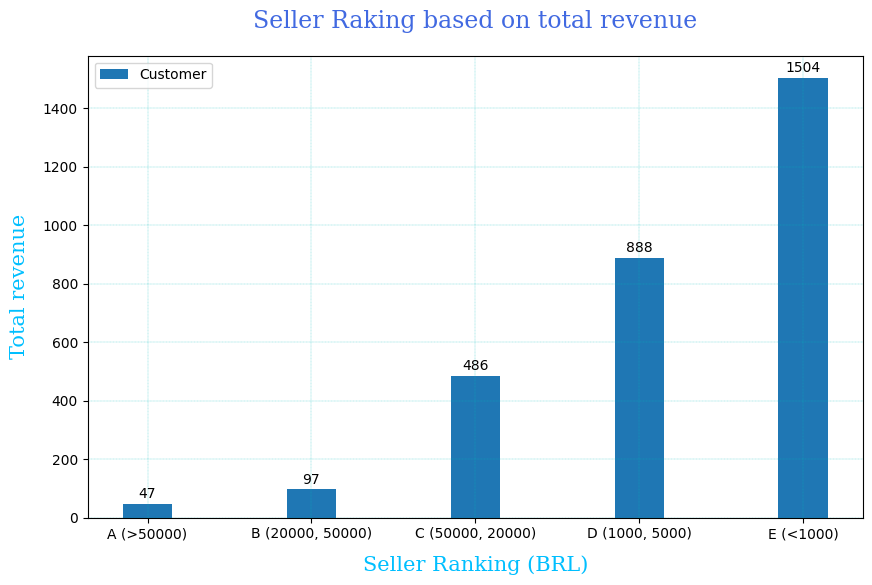

In [36]:
df_seller = df[['seller_id', 'payment']].groupby('seller_id').sum()
df_seller = pd.DataFrame({'Rank': ['A (>50000)','B (20000, 50000)','C (50000, 20000)','D (1000, 5000)','E (<1000)'],
              'No. seller': [
                  df_seller[df_seller['payment'] > 50000].shape[0],
                  df_seller[df_seller['payment'].between(20000, 50000)].shape[0],
                  df_seller[df_seller['payment'].between(5000, 20000)].shape[0],
                  df_seller[df_seller['payment'].between(1000, 5000)].shape[0],
                  df_seller[df_seller['payment'].between(0, 1000)].shape[0],
              ]})

labels = df_seller['Rank']
data = df_seller
title = "Seller Raking based on total revenue"
x_axis_name = "Seller Ranking (BRL)"
y_axis_name = "Total revenue"

# region Plotting Bar Char
plt.figure(figsize=(10,6), dpi=100)
plt.bar(labels, data['No. seller'], width=0.3,label="Customer") 

for i in range(len(data['No. seller'])):
    plt.text(i, data['No. seller'][i] + 20,data['No. seller'][i], ha='center')

plt.grid(True, linewidth=0.2, linestyle='--',color='c') #only for single column
plt.xlabel(x_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15}, labelpad=10)
plt.ylabel(y_axis_name,fontdict={'color':'deepskyblue','family':'serif','size':15},labelpad=10)
plt.title(title,fontdict={'color':'royalblue','family':'serif','size':17},loc='center',pad=20)
plt.legend()

plt.show() 
# endregion



#### Category ranking with product quantity ascending

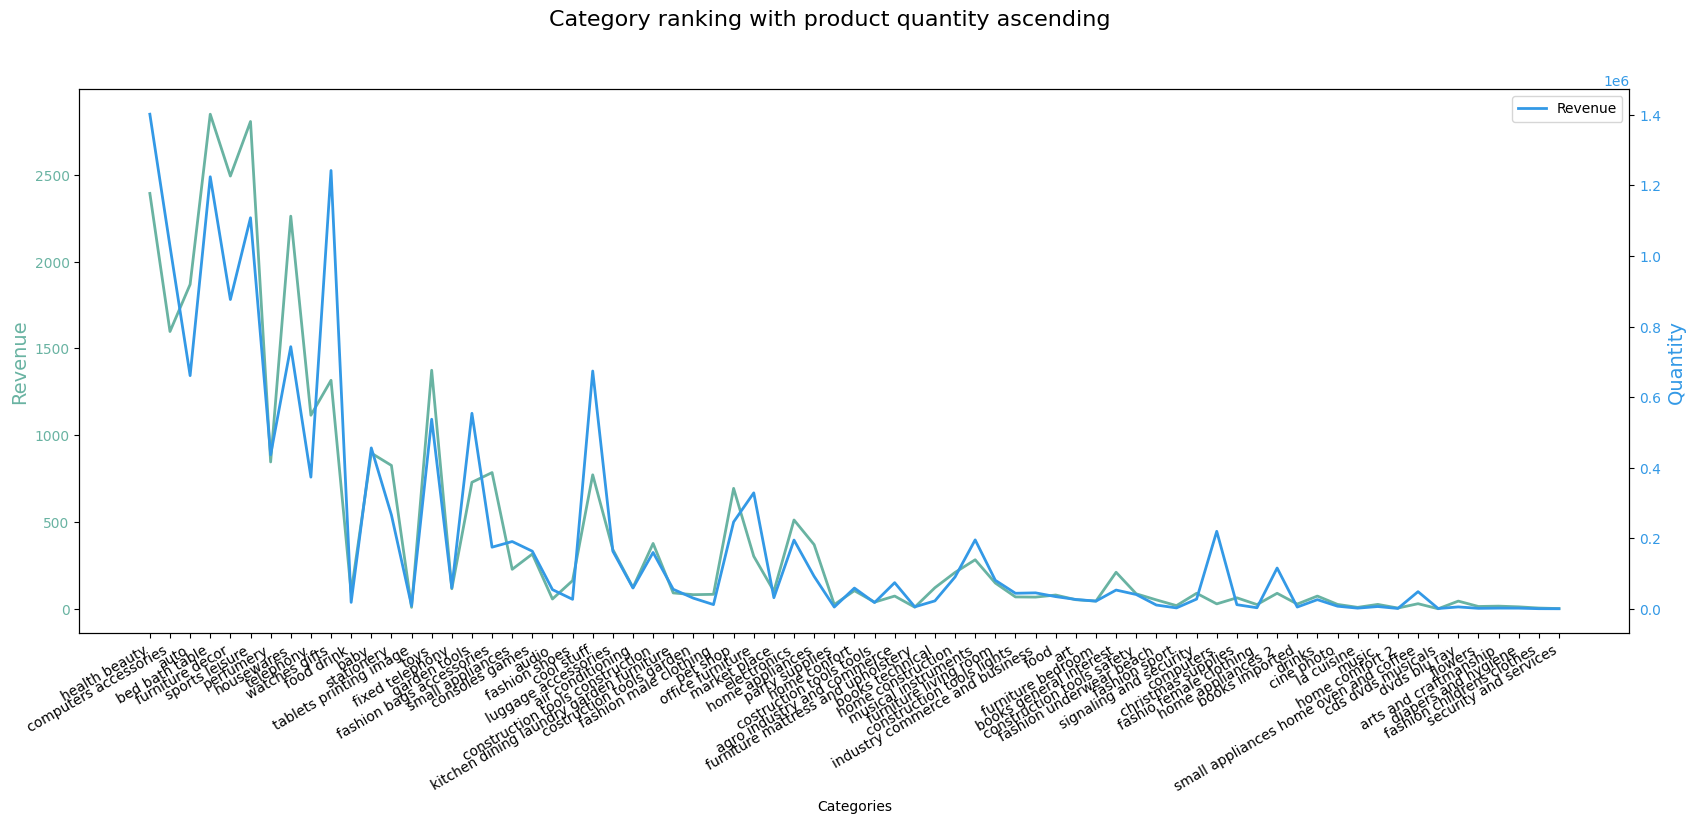

In [37]:
df_cate_revenue = df[df['order_status'] == 'delivered'][["product_category", "payment"]].groupby('product_category', sort=False).sum()

df_cate_pro_quantity = df[["product_category", "product_id"]].drop_duplicates().groupby(by='product_category', sort=False).count().rename(columns={'product_id':'no. product'})

df_cate_ranking = pd.merge(df_cate_revenue, df_cate_pro_quantity, on='product_category').reset_index()

COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

ax1.plot(df_cate_ranking['product_category'], df_cate_ranking['no. product'], color=COLOR_TEMPERATURE, lw=2, label="Quantity")
ax2.plot(df_cate_ranking['product_category'], df_cate_ranking['payment'], color=COLOR_PRICE, lw=2, label="Revenue")

ax1.set_xlabel("Categories")

ax1.set_ylabel("Revenue", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Quantity", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.suptitle("Category ranking with product quantity ascending",fontsize='16')
fig.autofmt_xdate()

plt.legend()
plt.show()




### Logistic based optimization 

#### Potential Customer's state versus seller's State

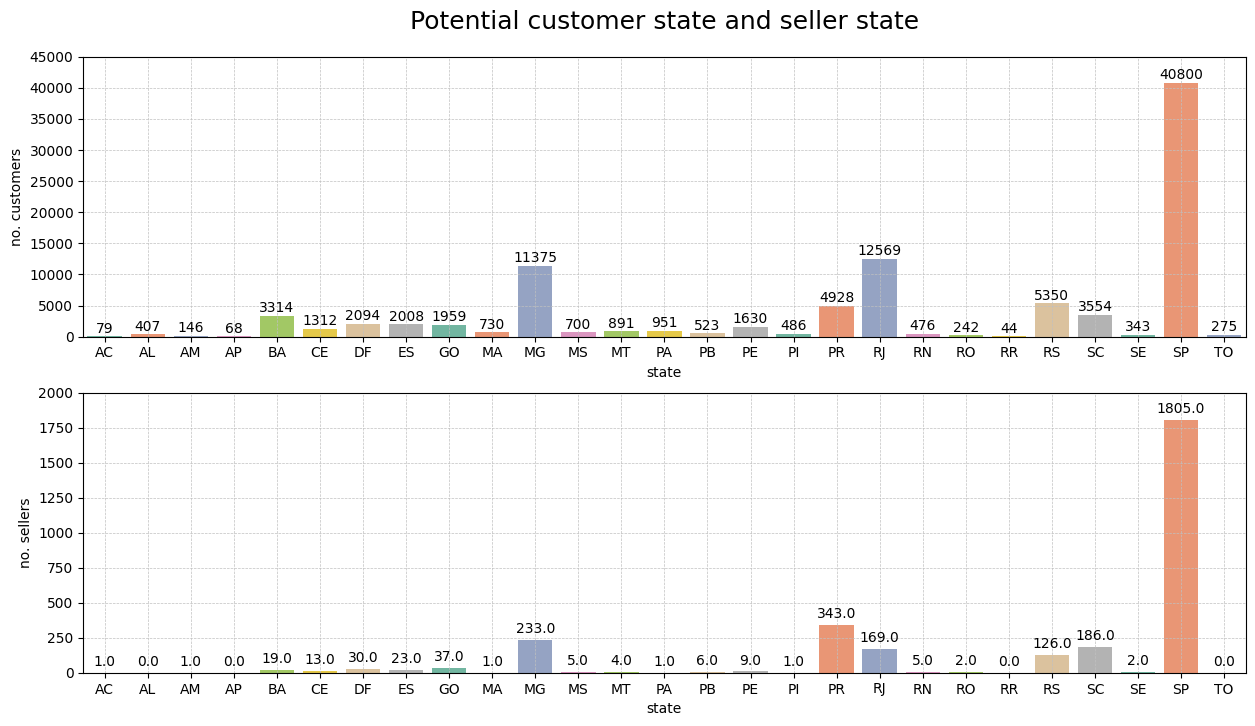

In [38]:
df_cus_state = pd.DataFrame()
df_cus_state['no. customers'] = df['customer_id'].copy()
df_cus_state['state'] = df['customer_state'].copy()
df_cus_state = df_cus_state.drop_duplicates(['no. customers', 'state'])
df_cus_state = df_cus_state.groupby(by='state', sort=True).count()

df_seller_state = pd.DataFrame()
df_seller_state['no. sellers'] = df['seller_id'].copy()
df_seller_state['state'] = df['seller_state'].copy()
df_seller_state = df_seller_state.drop_duplicates(['no. sellers', 'state'])
df_seller_state = df_seller_state.groupby(by='state', sort=True).count()

df_seller_cus = pd.merge(df_cus_state,
                  df_seller_state,
                  on='state',how='left').fillna(0)
df_seller_cus = df_seller_cus.reset_index()
# df_seller_cus['no. sellers'] = df_seller_cus['no. sellers'].astype('int32')

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Potential customer state and seller state", pad=20, fontsize=18)

sns.barplot(data=df_seller_cus, x='state', y='no. customers',palette='Set2', hue='state', errorbar=None)
for i in range(len(df_seller_cus['no. customers'])):
    plt.text(i, df_seller_cus['no. customers'][i] + 600, df_seller_cus['no. customers'][i], ha='center')
plt.ylim(0,45000)
plt.grid(axis='both',linestyle='--',linewidth=0.5,color='silver')
plt.subplot(2,1,2)
sns.barplot(data=df_seller_cus, x='state', y='no. sellers',palette='Set2', hue='state', errorbar=None)
for i in range(len(df_seller_cus['no. sellers'])):
    plt.text(i, df_seller_cus['no. sellers'][i] + 50, df_seller_cus['no. sellers'][i], ha='center')
plt.ylim(0,2000)

plt.grid(axis='both',linestyle='--',linewidth=0.5,color='silver')

plt.show()



#### Find best routes for transporting between states based on weight and volume orders

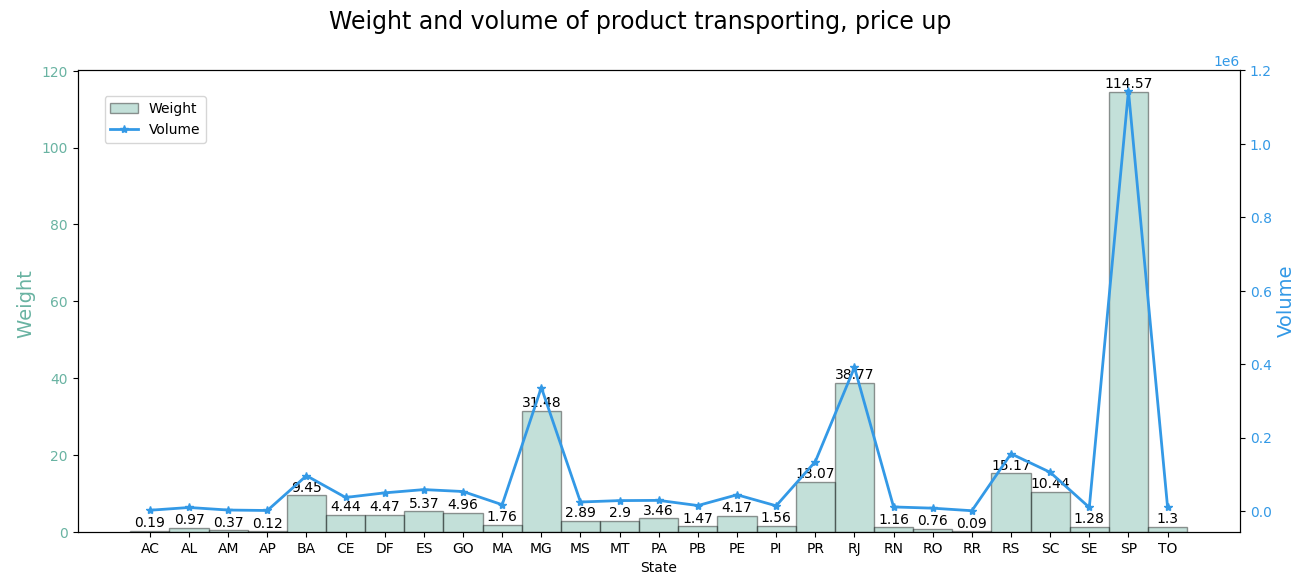

In [39]:
df_logistic = df[['customer_state']].copy()
df_logistic['weight_(kg)']  = df['quantity'] * df['product_weight_g'] / 1000
df_logistic['volume_(m3)'] = (df['product_length_cm'] * df['product_height_cm'] * df['product_weight_g']) / 1000000000
df_logistic = df_logistic.groupby('customer_state').sum().reset_index()
df_logistic['volume_(m3)'] = round(df_logistic['volume_(m3)'], 2)
df_logistic['weight_(kg)'] = round(df_logistic['weight_(kg)'], 2)

fig, ax2 = plt.subplots(figsize=(15, 6))
ax1 = ax2.twinx()

ax2.bar( df_logistic['customer_state'], df_logistic['volume_(m3)'],color=COLOR_TEMPERATURE, edgecolor="black", alpha=0.4, width=1.0)

ax1.plot(df_logistic['customer_state'],df_logistic['weight_(kg)'],  color=COLOR_PRICE, lw=2,linestyle='-', marker='*')
for i in range(len(df_logistic['volume_(m3)'])):
    ax2.text(i, df_logistic['volume_(m3)'][i] + 1, df_logistic['volume_(m3)'][i], ha='center')


ax2.set_xlabel("State")
ax2.set_ylabel("Weight ", color=COLOR_TEMPERATURE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax1.set_ylabel("Volume", color=COLOR_PRICE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.legend(["Weight", "Volume"], loc=(0.08, 0.756))
fig.suptitle("Weight and volume of product transporting, price up", fontsize=17)

plt.show()



#### Domestic products versus customer orders

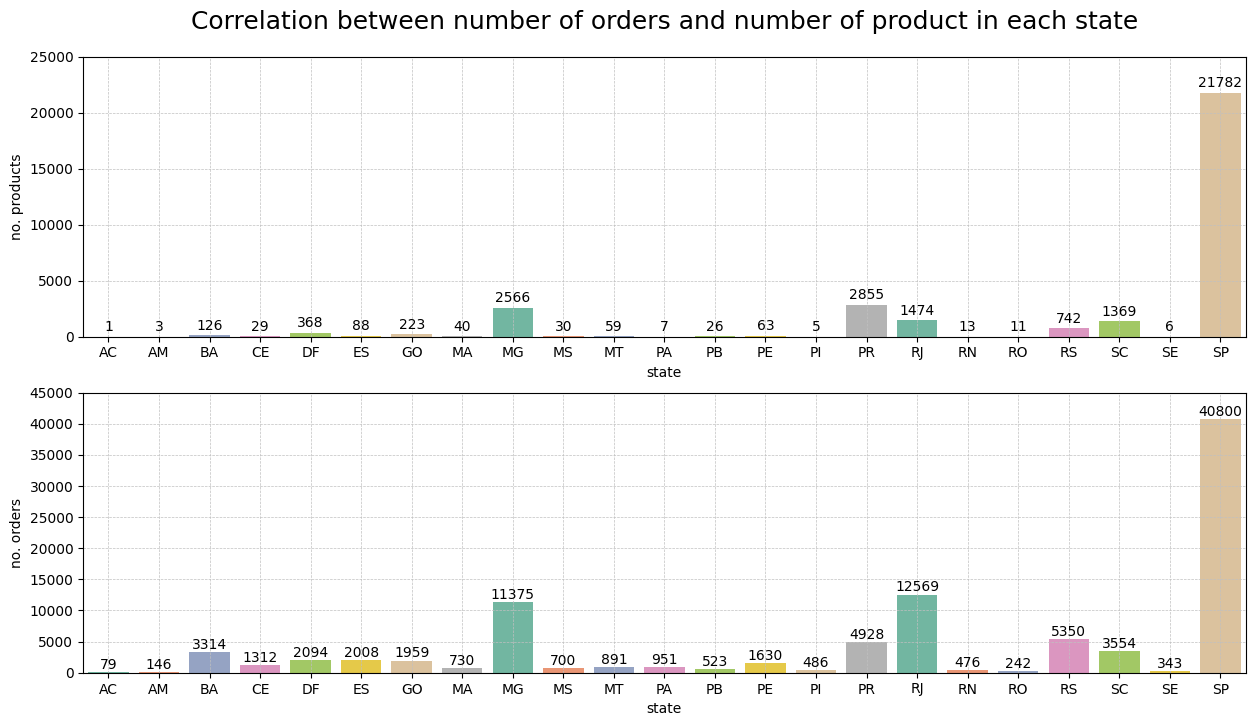

In [40]:
df_product_loc = df[['product_id', 'seller_state']].rename(columns={'seller_state': 'state'})
df_product_loc = df_product_loc.drop_duplicates().groupby('state')['product_id'].count().to_frame()
df_product_loc = df_product_loc.rename(columns={ 'product_id': 'no. products'}).copy()

df_order_loc = df[['customer_state', 'order_id']].rename(columns={'customer_state': 'state'})
df_order_loc   = df_order_loc.drop_duplicates().groupby('state')['order_id'].count().to_frame()
df_order_loc  = df_order_loc.rename(columns={ 'order_id': 'no. orders'})

df_ord_pro_state =  pd.merge(df_product_loc,df_order_loc, on='state', how='left').fillna(0)
df_ord_pro_state = df_ord_pro_state.reset_index()


plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Correlation between number of orders and number of product in each state", pad=20, fontsize=18)

sns.barplot(data=df_ord_pro_state, x='state', y='no. products',palette='Set2', hue='state', errorbar=None)
for i in range(len(df_ord_pro_state['no. products'])):
    plt.text(i, df_ord_pro_state['no. products'][i] + 500, df_ord_pro_state['no. products'][i], ha='center')
plt.ylim(0,25000)
plt.grid(axis='both',linestyle='--',linewidth=0.5,color='silver')
plt.subplot(2,1,2)
sns.barplot(data=df_ord_pro_state, x='state', y='no. orders',palette='Set2', hue='state', errorbar=None)
for i in range(len(df_ord_pro_state['no. orders'])):
    plt.text(i, df_ord_pro_state['no. orders'][i] + 500 , df_ord_pro_state['no. orders'][i], ha='center')
plt.ylim(0,45000)

plt.grid(axis='both',linestyle='--',linewidth=0.5,color='silver')

plt.show()





### Time series

#### Total revenue 2016 - 2018

order_id                0
customer_id             0
quantity                0
price_MRP               0
payment                 0
year                    0
month                   0
day                     0
time                    0
rating                  0
product_category        0
product_id              0
payment_type            0
order_status            0
product_weight_g        0
product_length_cm       0
product_height_cm       0
product_width_cm        0
customer_state          0
seller_id               0
seller_state            0
payment_installments    0
dtype: int64

### Geography maps

In [65]:
df.nlargest(10, 'payment').reset_index(drop=True)

,order_id,customer_id,quantity,price_MRP,payment,year,month,day,time,rating,product_category,product_id,payment_type,order_status,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_state,seller_id,seller_state,payment_installments
0,0ac26deee09,17372b5b171,10,1680.00,13664.08,2017,9,29,15:24:00,1,fixed telephony,59031c8a01e,credit_card,delivered,750,16,16,16,RJ,bc0d1a44d2b,SP,21
1,7e2ed697502,ebae42611ff,5,1790.00,7274.88,2018,7,15,14:49:00,1,fixed telephony,13a6e5d7cf4,boleto,delivered,1100,20,16,20,ES,bc0d1a44d2b,SP,18
2,029a7ab2caa,c21b158c4aa,18,6735.00,6929.31,2017,2,12,20:37:00,5,housewares,4aa0059f1c7,credit_card,delivered,30000,60,61,33,MS,e48a897eeb7,SP,5
3,fa6f9819e17,fd4be3bf611,12,6729.00,6922.21,2018,7,25,18:10:00,1,computers,65ffbd70ce2,boleto,delivered,5660,54,18,47,ES,8ebe3fc9a4e,PR,2
4,f3314d8f780,367c85d04cf,4,6499.00,6726.66,2017,5,24,18:14:00,5,art,1f6150a678a,boleto,delivered,7400,47,25,25,SP,e7fbd414be9,GO,6
5,2995675d8e5,05fc233a67c,18,989.10,6081.54,2017,11,24,11:03:00,1,agro industry and commerce,c35a07a1496,boleto,delivered,1500,22,16,24,MG,fa967980cce,RS,17
6,a6a6423a948,d544a373627,16,4799.00,4950.34,2017,4,1,15:58:00,5,small appliances,a9c3c961fd6,credit_card,delivered,22600,55,40,40,RJ,5153d2210d9,SP,21
7,b4640b738d9,e220efcc5a5,1,2299.95,4809.44,2018,7,12,12:08:00,1,cool stuff,304f2652564,credit_card,canceled,12667,39,38,35,GO,c7e05865d15,SP,14
8,1a1cc9d7b8d,2bff15eedc1,7,4690.00,4764.34,2017,4,18,18:50:00,4,small appliances,cd299b844e4,credit_card,delivered,30000,50,49,50,SP,5153d2210d9,SP,10
9,8cd4432d951,37863c4b41d,8,4590.00,4681.78,2018,6,22,12:23:00,5,computers,20a4441fc31,credit_card,delivered,2900,35,10,40,PB,cd628af1b36,BA,13


Exception: you must provide at least a filename.